In [1]:
#Paquetes necesarios: numpy, matplotlib y astropy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import ZScaleInterval


In [2]:
#Abrimos los darks, son de 100 segundos de exposición igual que las imágenes de ciencia
dark1=fits.open('dark/Dark_600.000secs_00000208.fit')[0].data
dark2=fits.open('dark/Dark_600.000secs_00000209.fit')[0].data
dark3=fits.open('dark/Dark_600.000secs_00000210.fit')[0].data
dark4=fits.open('dark/Dark_600.000secs_00000211.fit')[0].data
dark5=fits.open('dark/Dark_600.000secs_00000212.fit')[0].data
dark6=fits.open('dark/Dark_600.000secs_00000213.fit')[0].data
dark7=fits.open('dark/Dark_600.000secs_00000214.fit')[0].data
dark8=fits.open('dark/Dark_600.000secs_00000215.fit')[0].data
dark9=fits.open('dark/Dark_600.000secs_00000216.fit')[0].data
dark10=fits.open('dark/Dark_600.000secs_00000217.fit')[0].data

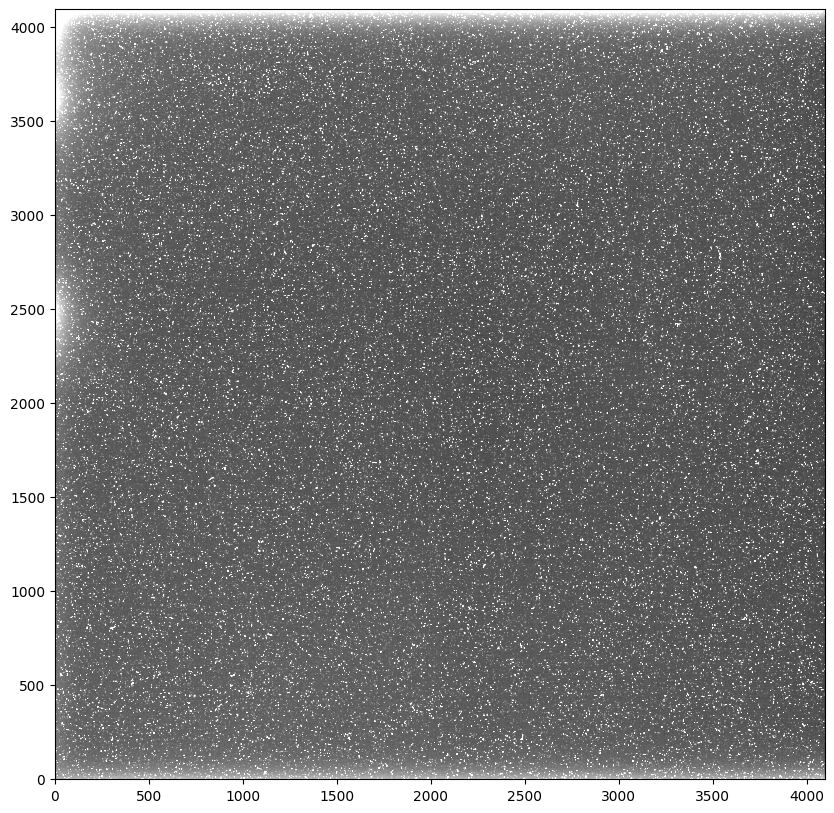

In [3]:
#Grafiquemos un dark
zscale=ZScaleInterval(contrast=0.25)
min_value,max_value=zscale.get_limits(dark1)

fig=plt.figure(figsize=(10,10))
plt.imshow(dark1,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.show()

In [4]:
#Generamos un master dark para cada filtro y un dark current

master_darkV=np.median([dark1,dark2,dark3,dark4,dark5,dark6,dark7,dark8,dark9,dark10],axis=0) #Combinación simple de darks, incluye bias
#Generamos un factor escala debido a que no poseemos darks de 900 segundos para el filtro B
factor_escala = 900 / 600
master_darkB = master_darkV * factor_escala

with fits.open('master_bias.fit') as hdul:
    master_bias = hdul[0].data  # Extraemos los datos del archivo FITS
dark_current=np.mean([dark1-master_bias,dark2-master_bias,dark3-master_bias,dark4-master_bias,dark5-master_bias,dark6-master_bias,dark7-master_bias,dark8-master_bias,dark9-master_bias,dark10-master_bias],axis=0)/600 #Dark por segundo, no incluye bias


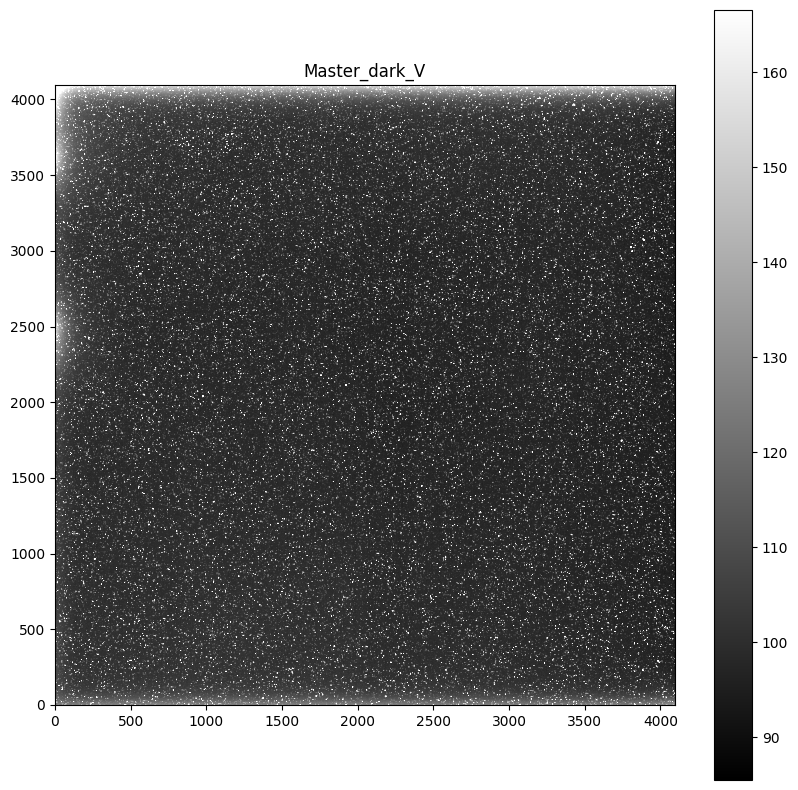

In [8]:
zscale=ZScaleInterval(contrast=0.10)
min_value,max_value=zscale.get_limits(master_darkV)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkV,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_dark_V')
plt.colorbar()
plt.show()

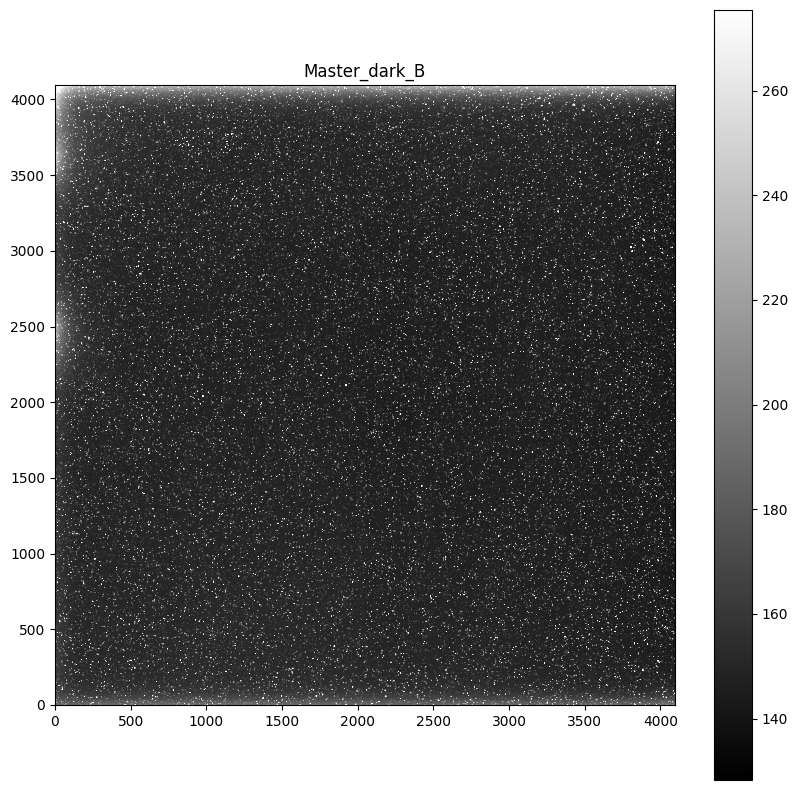

In [9]:
zscale=ZScaleInterval(contrast=0.08)
min_value,max_value=zscale.get_limits(master_darkB)
fig=plt.figure(figsize=(10,10))
plt.imshow(master_darkB,vmin=min_value,vmax=max_value,cmap='gray',origin='lower')
plt.title('Master_dark_B')
plt.colorbar()
plt.show()

In [7]:
from astropy.io import fits
hdu = fits.PrimaryHDU(master_darkV)
hdu.writeto('master_darkV.fit', overwrite=True)

hdu = fits.PrimaryHDU(master_darkB)
hdu.writeto('master_darkB.fit', overwrite=True)

hdu = fits.PrimaryHDU(dark_current)
hdu.writeto('dark_current.fit', overwrite=True)